In [1]:
import numpy as np
from QAM_EncoderDecoder import * 
import commpy
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
%matplotlib inline

N = 1024
prefix_no = 32
fs = 441000

## 1. Generate random symbols

In [2]:
random_array = np.random.randint(0,100, int(50/4))
random_array

array([30, 24, 67, 15, 75, 35, 89, 51, 63, 48,  8, 41])

In [3]:
bin_strings=''
for byte in random_array:
    binary_string = '{0:08b}'.format(byte)
    bin_strings+=binary_string
bin_strings

'000111100001100001000011000011110100101100100011010110010011001100111111001100000000100000101001'

In [4]:
len(bin_strings)

96

In [5]:
constellation = encode_bitstr2symbols(bin_strings)
len(constellation)

about to do encode_bitstr2symbols encoding
encode_bitstr2symbols encoding finished


48

In [6]:
constellation[0:5]

[(1+1j), (-1+1j), (-1-1j), (1-1j), (1+1j)]

In [7]:
#----iDFT----
frames=np.fft.ifft(constellation)
        

# ----add cyclic prefix----
cyclic_prefix = frames[len(constellation)-prefix_no:len(constellation)]
        
frames = np.append(cyclic_prefix, frames, axis=0)        

In [8]:
frames.shape

(80,)

##  2 Convolv with a simple channel:


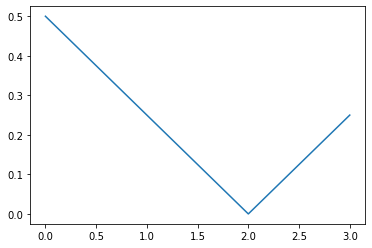

In [9]:
sim_channel = np.array([0.5, 0.25, 0.0, 0.25])
plt.plot(sim_channel)

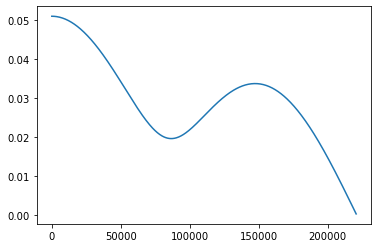

In [10]:
chan_fft = np.fft.fft(sim_channel, 1024)
chan_fft /= np.linalg.norm(chan_fft)
plt.plot(np.linspace(0,fs/2,int(N/2)),np.abs(chan_fft)[0:int(N/2)])

In [11]:
frames.shape

(80,)

In [12]:
channel_out = np.convolve(frames, sim_channel)
channel_out.shape

(83,)

C:\Users\H1937\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


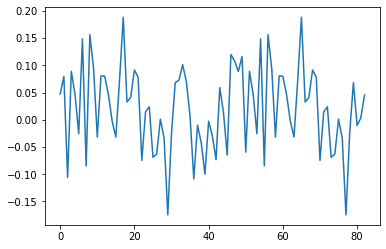

In [14]:
plt.plot(channel_out)

C:\Users\H1937\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


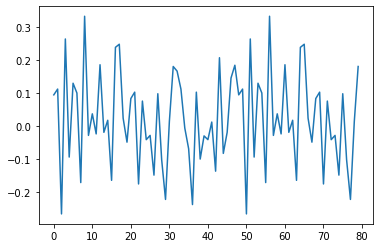

In [15]:
plt.plot(frames)

## 3. Decode the received audio

In [16]:
recorded = channel_out[32:48+32]
recorded.shape

(48,)

Here, if you use real channel, multiple channel output should be averaged before doing the fft to cancel out the noise.

In [17]:
recorded_frequency = np.fft.fft(recorded)

In [19]:
freq_response = recorded_frequency / np.array(constellation)

array([ 1.00000000e+00+0.00000000e+00j,  9.78831098e-01-1.28302406e-01j,
        9.18258152e-01-2.41481457e-01j,  8.26640741e-01-3.26640741e-01j,
        7.16506351e-01-3.75000000e-01j,  6.02667477e-01-3.83160240e-01j,
        5.00000000e-01-3.53553391e-01j,  4.21220474e-01-2.94009193e-01j,
        3.75000000e-01-2.16506351e-01j,  3.64700975e-01-1.35299025e-01j,
        3.87928066e-01-6.47047613e-02j,  4.36960690e-01-1.68913322e-02j,
        5.00000000e-01+0.00000000e+00j,  5.63039310e-01-1.68913322e-02j,
        6.12071934e-01-6.47047613e-02j,  6.35299025e-01-1.35299025e-01j,
        6.25000000e-01-2.16506351e-01j,  5.78779526e-01-2.94009193e-01j,
        5.00000000e-01-3.53553391e-01j,  3.97332523e-01-3.83160240e-01j,
        2.83493649e-01-3.75000000e-01j,  1.73359259e-01-3.26640741e-01j,
        8.17418481e-02-2.41481457e-01j,  2.11689015e-02-1.28302406e-01j,
       -3.46944695e-17+2.08166817e-17j,  2.11689015e-02+1.28302406e-01j,
        8.17418481e-02+2.41481457e-01j,  1.73359259

In [20]:
impulse_channel = np.fft.ifft(freq_response)

array([ 5.00000000e-01+3.85975973e-17j,  2.50000000e-01+5.92697188e-18j,
        1.70080502e-17+4.31054408e-18j,  2.50000000e-01+6.50521303e-18j,
        9.91720311e-18+6.80952947e-18j,  2.88801759e-17+1.81475058e-17j,
       -6.16223175e-18+1.36049374e-19j,  5.47253308e-18+5.65860922e-18j,
        1.24003028e-17+4.39833728e-18j,  2.27726899e-17-9.31338713e-18j,
       -1.11219385e-17-4.29446527e-18j, -1.43314814e-17+4.64594202e-18j,
       -8.09537622e-18-3.03576608e-18j, -2.89120579e-18-1.31549864e-17j,
        5.11564329e-18+2.19682119e-17j, -2.31296463e-18-4.33680869e-19j,
        0.00000000e+00-6.50521303e-18j,  7.38742479e-19-1.22876246e-17j,
       -3.79820162e-19-3.13497658e-18j,  5.24568628e-18-7.37257477e-18j,
       -1.51213735e-17-4.20744426e-18j, -5.17228837e-18+1.91490489e-17j,
       -4.20594615e-18+1.06249701e-17j,  1.46636082e-18+9.66478148e-18j,
        9.25185854e-18+8.52905709e-18j,  9.25185854e-18-9.10729825e-18j,
        4.92359797e-18+1.25095992e-17j,  3.23815049

In [21]:
impulse_channel[0:4]

array([5.00000000e-01+3.85975973e-17j, 2.50000000e-01+5.92697188e-18j,
       1.70080502e-17+4.31054408e-18j, 2.50000000e-01+6.50521303e-18j])

In [22]:
print(np.linalg.norm(impulse_channel[0]),np.linalg.norm(impulse_channel[1]), np.linalg.norm(impulse_channel[2]), np.linalg.norm(impulse_channel[3]))

0.49999999999999983 0.24999999999999994 1.7545784739621018e-17 0.24999999999999994


In [81]:
sim_channel

array([0.5 , 0.25, 0.  , 0.25])